In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
from Backtesting import *

In [3]:
directory = "O:/AARM/Direct/Top Holdings/Research/Biotech/NW/"

bt_data = BacktesterData(
    holdings_path=directory + 'Output/holdings.csv',
    sec_master_path=directory + 'Output/security_master.csv',
    sec_mapping_path=directory + 'Output/security_mapping.csv',
    sec_out_path=directory + 'Output/security_out.csv',
    managers_path=directory + 'Input/managers.xlsx'
)

In [4]:
bt = FilingBacktester(bt_data)

# Set pandas option to suppress the FutureWarning about downcasting
import pandas as pd
pd.set_option('future.no_silent_downcasting', False)


In [5]:
mkt_cap = bt.sec_mkt_cap_df
eligible = bt.eligible_securities_df
rets = bt.sec_rets_df
valid_rets = (rets == 0).sum(axis=1) < 0.9*len(rets.columns)
mkt_cap = mkt_cap.multiply(eligible)
mkt_cap = mkt_cap.replace(0, np.nan)
mkt_cap = mkt_cap.loc[valid_rets]
rets = rets.loc[valid_rets]

# Size
size_score = np.log(mkt_cap)
size_score = bt.standardize_factor_scores(size_score).shift(1)

# Separate Reversal (short-term) and Momentum (long-term) factors
MOMENTUM_LONG_PERIOD = 252 #~1 year
REVERSAL_PERIOD = 21 #~1 month

# Long-term momentum component
# Calculate returns excluding the most recent REVERSAL_PERIOD (21 days)
# and including only the period from t-MOMENTUM_LONG_PERIOD to t-REVERSAL_PERIOD
momentum_score = np.log(rets+1).shift(REVERSAL_PERIOD).rolling(window=MOMENTUM_LONG_PERIOD-REVERSAL_PERIOD, min_periods=63).mean().fillna(0)
momentum_score = bt.standardize_factor_scores(momentum_score).shift(1)

# Short-term reversal component (negative of short-term returns)
reversal_score = -np.log(rets+1).ewm(halflife=REVERSAL_PERIOD, adjust=True).mean().fillna(0)
reversal_score = bt.standardize_factor_scores(reversal_score).shift(1)

factor_scores = {'Size': size_score, 'Momentum': momentum_score, 'Reversal': reversal_score}
factor_rets = bt.get_factor_returns(factor_scores)

Error fitting model for 2010-01-05 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-06 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-07 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-08 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-11 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-12 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-13 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-14 00:00:00: zero-size array to reduction operation maximum which has no identity
Error fitting model for 2010-01-15 00:00:00: zero-size array to reduction operation maxi

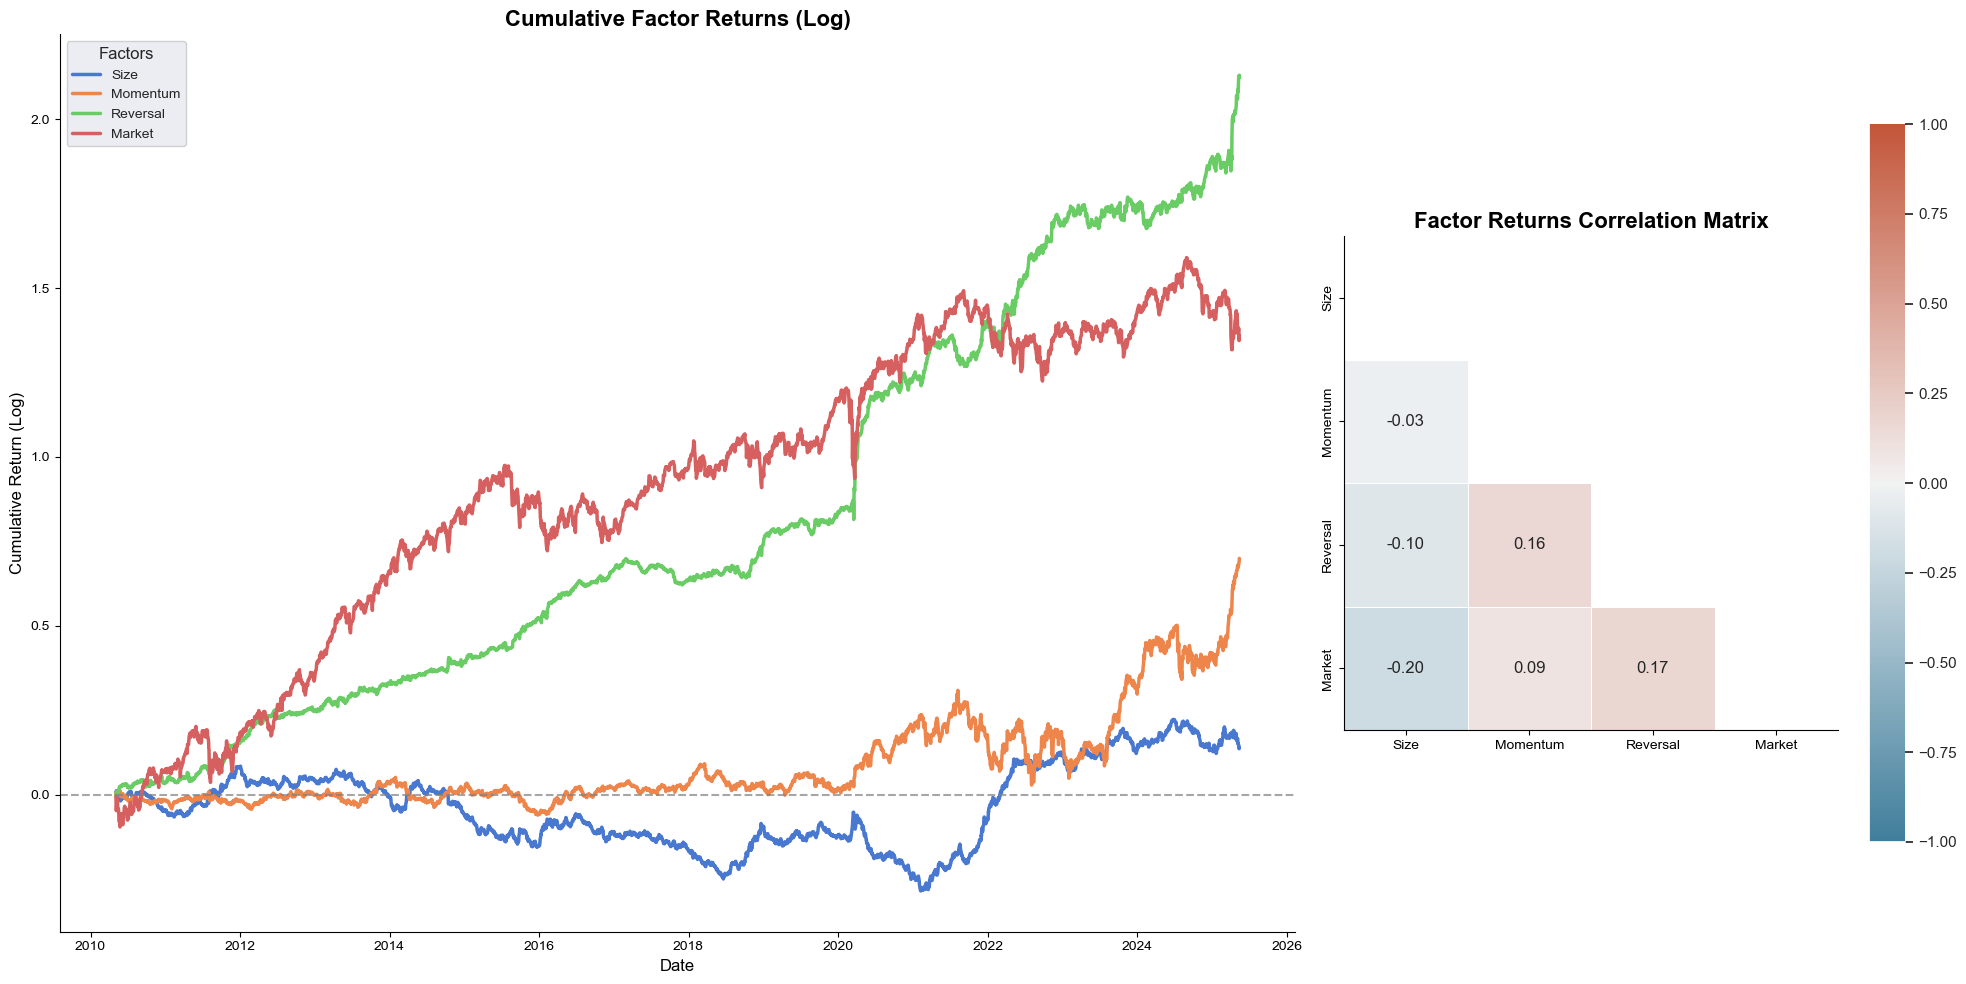

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

factor_rets_filtered = factor_rets.dropna(how='all')
factor_rets_clean = factor_rets_filtered.fillna(0)
cum_factor_rets = np.log(1 + factor_rets_clean).cumsum()

# Create a figure with side-by-side subplots
fig = plt.figure(figsize=(20, 10))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# Set the seaborn style
sns.set_theme(style="darkgrid")

# Plot 1: Cumulative Factor Returns
sns.lineplot(data=cum_factor_rets, dashes=False, linewidth=2.5, palette="muted", ax=ax1)

# Enhance the plot with better formatting
ax1.set_title('Cumulative Factor Returns (Log)', fontsize=16, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Cumulative Return (Log)', fontsize=12)
ax1.legend(title='Factors', title_fontsize=12, fontsize=10, frameon=True, framealpha=0.9)

# Add a zero line for reference
ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.7)

# Plot 2: Factor Return Correlations
corr_matrix = factor_rets_clean.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            annot=True, fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .8}, ax=ax2)

ax2.set_title('Factor Returns Correlation Matrix', fontsize=16, fontweight='bold')

# Format the plots
sns.despine(left=False, bottom=False)
plt.tight_layout()
plt.show()

Acuta
Portfolio size was: 10000000 dollars.
Problematic Dates and Actual Weight Sums:
  Date: 2015-08-14, Max Portfolio Capacity: 9677803.478710
  Date: 2016-05-15, Max Portfolio Capacity: 8421293.105000
ADAR1
Affinity
Allostery
Ally Bridge
Armistice
Portfolio size was: 10000000 dollars.
Problematic Dates and Actual Weight Sums:
  Date: 2015-02-14, Max Portfolio Capacity: 4941338.645000
  Date: 2015-05-15, Max Portfolio Capacity: 3930405.865440
  Date: 2015-08-14, Max Portfolio Capacity: 5351670.106980
  Date: 2015-11-14, Max Portfolio Capacity: 7335788.681805
  Date: 2016-02-14, Max Portfolio Capacity: 6077627.448935
  Date: 2016-05-15, Max Portfolio Capacity: 4156817.309180
  Date: 2016-11-14, Max Portfolio Capacity: 7799544.919370
Avidity
Avoro
Portfolio size was: 10000000 dollars.
Problematic Dates and Actual Weight Sums:
  Date: 2016-02-14, Max Portfolio Capacity: 9490779.088036
Baker Bros
Boxer
Braidwell
Broadfin
BVF
Portfolio size was: 10000000 dollars.
Problematic Dates and Act

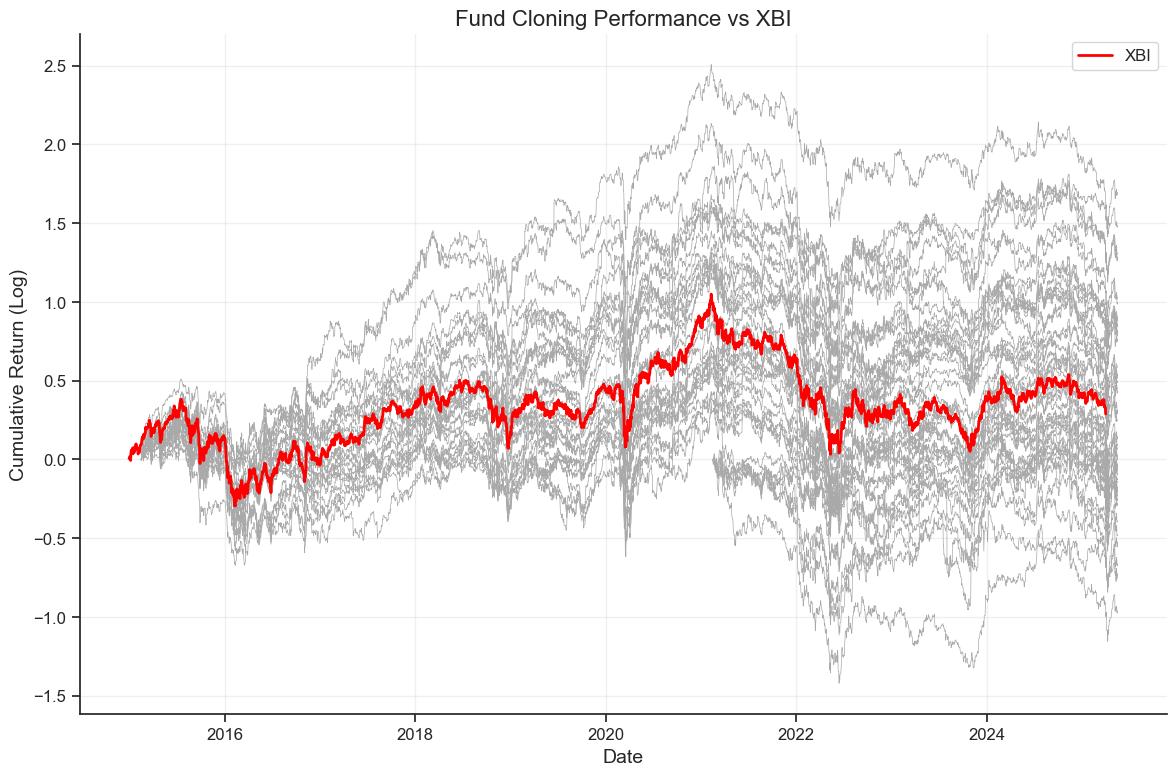

In [77]:
xbi = bt.sec_rets_df['XBI US'].loc[pd.Timestamp('2014-12-31'):pd.Timestamp('2025-03-31')]
xbi_cum_perf = np.log(1+xbi).cumsum()

ADD_COEF = 0.5

# Create a dictionary to store fund performance for later reference
fund_performances = {}
fund_idio_returns = {}
fund_holdings = {}

quarter_ends = pd.date_range(
    start=pd.Timestamp('2014-12-31'),
    end=pd.Timestamp('2024-12-31'),
    freq='QE'  # Quarter end frequency (updated from 'Q')
)

calendar_quarter_total_returns = bt.get_period_returns(dates=quarter_ends).shift(-1) #shift back one quarter to align with fund holdings


# Process each fund first
for fund in bt.manager_df[~(bt.manager_df['Public_Start'].isna() | bt.manager_df['Public_End'].isna() | bt.manager_df['Not_Biotech'] | bt.manager_df['Contamination'])]['Master'].unique():
    print(fund)

    #holdings = bt.get_fund_holdings(fund, contamination = bt.manager_df.loc[bt.manager_df['Master'] == fund, 'Contamination'].values[0])
    holdings = bt.get_fund_holdings(fund)
    holdings_mv = bt.get_fund_holdings(fund, normalize=False)

    holdings_chg = holdings_mv.mul(calendar_quarter_total_returns.reindex(index=holdings.index, columns=holdings.columns) + 1).shift(1).fillna(0)
    holdings_chg = holdings_chg.div(holdings_chg.sum(axis=1), axis=0).fillna(0)
    holdings_chg = holdings.sub(holdings_chg)

    holdings = holdings.add(ADD_COEF*holdings_chg).clip(lower=0)
    holdings = holdings.div(holdings.sum(axis=1), axis=0).fillna(0)

    holdings.index = holdings.index + pd.Timedelta(days=45)

    # Create mask for value_traded and price criteria
    liquidity_mask = (bt.value_traded_df.reindex(index=holdings.index, columns=holdings.columns) >= 1000000)
    price_mask = (bt_data.sec_price_df.reindex(index=holdings.index, columns=holdings.columns) >= 1)
    combined_mask = liquidity_mask & price_mask
    
    holdings = holdings.mul(combined_mask).fillna(0)

    fund_holdings[fund] = holdings
    
    holdings = bt.adjust_holdings(holdings, max_participation=0.1, port_size=10000000)
    
    if(len(holdings) == 0):
        print(f"{fund} has no holdings")
        continue
    
    perf = bt.get_strategy_returns(holdings, max(holdings.index)+pd.Timedelta(days=90))
    attr = bt.get_factor_attribution(holdings, factor_scores, factor_rets, max(holdings.index)+pd.Timedelta(days=90))

    # Store just the performance in the dictionary
    fund_performances[fund] = perf
    fund_idio_returns[fund] = attr['Idio']


# Create first figure for total performance
plt.figure(figsize=(12, 8))  # Increase figure size

# Plot each fund in light grey with no labels
for fund in fund_performances:
    perf = fund_performances[fund].fillna(0)
    cum_perf = np.log(1+perf).cumsum()
    plt.plot(cum_perf, color='darkgrey', linewidth=0.5)

# Add XBI in red with a label
plt.plot(xbi_cum_perf, color='red', linewidth=2, label='XBI')
plt.legend(fontsize=12)  # Larger legend text
plt.grid(True, alpha=0.3)
plt.title('Fund Cloning Performance vs XBI', fontsize=16)  # Larger title
plt.ylabel('Cumulative Return (Log)', fontsize=14)  # Larger y-axis label
plt.xlabel('Date', fontsize=14)  # Add and size x-axis label
plt.xticks(fontsize=12)  # Larger x-axis tick labels
plt.yticks(fontsize=12)  # Larger y-axis tick labels
plt.tight_layout()  # Adjust layout to fit larger elements
plt.show()

In [78]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

HALF_LIFE = 365*2

xbi = bt.sec_rets_df['XBI US'].loc[pd.Timestamp('2014-12-31'):pd.Timestamp('2025-03-31')]

quarter_ends = pd.date_range(
    start=pd.Timestamp('2014-12-31'),
    end=pd.Timestamp('2024-12-31'),
    freq='QE'  # Quarter end frequency (updated from 'Q')
)
quarter_ends_delayed = [date + pd.Timedelta(days=45) for date in quarter_ends]

# Create a DataFrame to store all IR values
all_ir_data = []

for date in quarter_ends_delayed:
    for fund in fund_performances:
        if date - pd.Timedelta(days=365) not in fund_performances[fund].index or (date >= max(fund_performances[fund].index)):
            continue

        cur_fund_perf = fund_performances[fund].loc[:date]
        xbi_perf = xbi.loc[cur_fund_perf.index]
        # Join XBI performance to fund performance
        combined_perf = pd.DataFrame({
            'fund': cur_fund_perf,
            'xbi': xbi_perf
        })
        # Drop rows where either fund or XBI performance is exactly 0
        combined_perf = combined_perf[(combined_perf['fund'] != 0) & (combined_perf['xbi'] != 0)]
        # Calculate exponential weights with a half-life of 255 days
        days_diff = (date - combined_perf.index).days
        combined_perf['Weight'] = np.exp(-np.log(2) * days_diff / HALF_LIFE)

        try:
            model = sm.WLS(combined_perf['fund'], sm.add_constant(combined_perf['xbi']), weights=combined_perf['Weight'])
            results = model.fit()
        except:
            print(f"Error fitting model for {fund} on {date}")
            continue

        daily_vol = np.sqrt(np.sum(combined_perf['Weight'] * results.resid**2)/np.sum(combined_perf['Weight']))
        daily_alpha = np.sum(results.resid * combined_perf['Weight'])/np.sum(combined_perf['Weight']) + results.params.iloc[0]

        idio_perf = fund_idio_returns[fund].loc[cur_fund_perf.index]
        weighted_idio_alpha = np.sum(idio_perf * combined_perf['Weight'])/np.sum(combined_perf['Weight'])
        weighted_idio_vol = np.sqrt(np.sum((idio_perf-weighted_idio_alpha)**2 * combined_perf['Weight'])/np.sum(combined_perf['Weight']))
        
        # Add to our list of IR data
        all_ir_data.append({
            'date': date,
            'fund': fund,
            'ir': daily_alpha/daily_vol,
            'alpha': daily_alpha,
            'idio_alpha': weighted_idio_alpha,
            'idio_vol': weighted_idio_vol,
            'idio_ir': weighted_idio_alpha/weighted_idio_vol
        })

# Convert the list to a DataFrame
ir_df = pd.DataFrame(all_ir_data)

In [94]:
# Filter out negative IR values
#ir_df.loc[ir_df['ir'] < 0, 'ir'] = 0

# For each date, calculate median IR and set weights based on that
for date in ir_df['date'].unique():
    date_mask = ir_df['date'] == date
    median_ir = ir_df[date_mask]['alpha'].median()
    
    # Set weights to 0 for funds below median IR
    ir_df.loc[date_mask, 'weight'] = ir_df.loc[date_mask, 'ir']
    # Get positive and negative weights
    pos_weights = ir_df.loc[date_mask & (ir_df['weight'] > 0), 'weight']
    neg_weights = ir_df.loc[date_mask & (ir_df['weight'] < 0), 'weight']
    
    # Scale positive weights to sum to 1.5
    if len(pos_weights) > 0:
        pos_sum = pos_weights.sum()
        ir_df.loc[date_mask & (ir_df['weight'] > 0), 'weight'] = pos_weights * (1.5/pos_sum)
    
    # Scale negative weights to sum to -0.5
    if len(neg_weights) > 0:
        neg_sum = neg_weights.sum()
        ir_df.loc[date_mask & (ir_df['weight'] < 0), 'weight'] = neg_weights * (-0.5/neg_sum)
    #ir_df.loc[date_mask & (ir_df['ir'] < median_ir), 'weight'] = 0

    # Calculate weights for funds above median IR
    ir_df.loc[date_mask, 'weight'] = ir_df.loc[date_mask, 'weight'] / ir_df.loc[date_mask, 'weight'].abs().sum()

# Create a blank DataFrame with all securities from sec_rets_df and all dates from ir_df
all_dates = ir_df['date'].unique()
all_securities = bt.sec_rets_df.columns.tolist()
final_holdings = pd.DataFrame(0.0, index=all_dates, columns=all_securities)

for date in all_dates:
    # Get the funds and their weights for that date
    funds_on_date = ir_df[ir_df['date'] == date]
    for fund, weight in zip(funds_on_date['fund'], funds_on_date['weight']):
        # Only add values for columns that exist in both DataFrames
        columns = fund_holdings[fund].columns
        final_holdings.loc[date, columns] += fund_holdings[fund].loc[date, columns] * weight

final_holdings[final_holdings < 0] = 0

# Renormalize by dividing each row by its sum
row_sums = final_holdings.sum(axis=1)
final_holdings = final_holdings.div(row_sums, axis=0)

final_holdings = bt.adjust_holdings(final_holdings, max_participation=0.3, port_size=100000000, n=100)

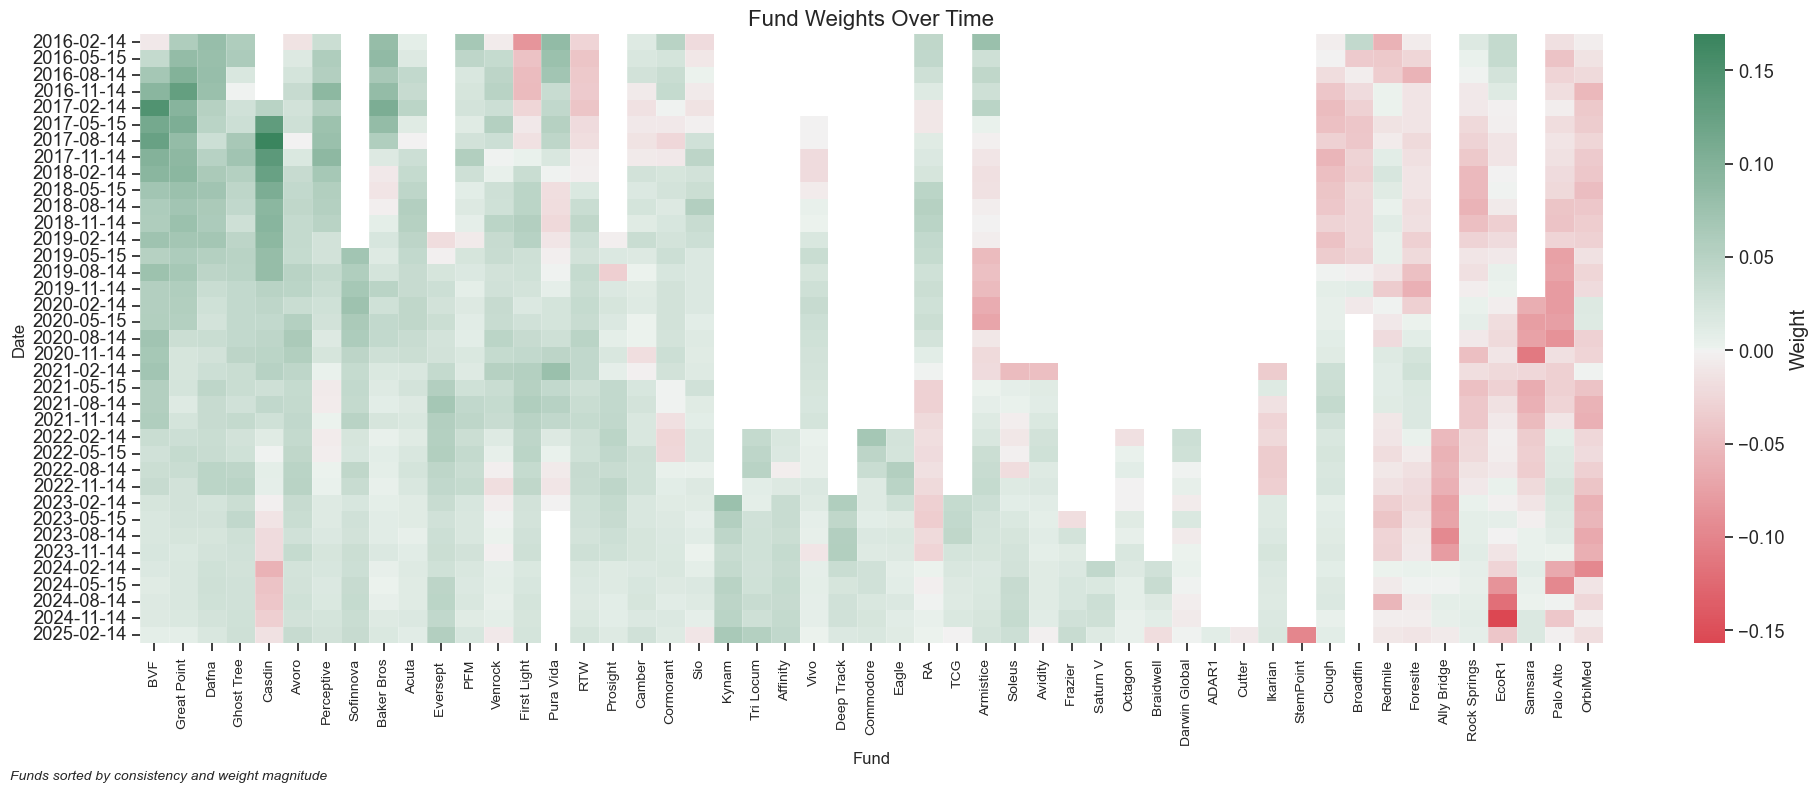

In [95]:
weight_pivot = ir_df.pivot(index='date', columns='fund', values='weight')
# Replace zeros with NaN for better visualization
weight_pivot = weight_pivot.replace(0, np.nan)

# Calculate the sum of weights over all time for each fund
fund_weight_sums = weight_pivot.sum()

# Sort funds by their total weight sum over all time
sorted_funds = fund_weight_sums.sort_values(ascending=False).index
weight_pivot = weight_pivot[sorted_funds]

# Create a diverging colormap centered at 0 with green for positive and red for negative
custom_cmap = sns.diverging_palette(10, 145, as_cmap=True)  # Changed order to make green positive

# Plot - Regular weights with increased width to show all funds
plt.figure(figsize=(20, 8))  # Increased width from 12 to 20
ax1 = sns.heatmap(weight_pivot, cmap=custom_cmap, center=0, cbar_kws={'label': 'Weight'})

plt.title('Fund Weights Over Time', fontsize=16)
plt.xlabel('Fund', fontsize=12)
plt.ylabel('Date', fontsize=12)

# Rotate x-axis labels for better readability and ensure all are visible
plt.xticks(rotation=90, fontsize=10)
plt.tick_params(axis='x', which='major', pad=5)  # Add padding for x-axis labels

# Format dates on y-axis
date_format = plt.matplotlib.dates.DateFormatter('%Y-%m-%d')
ax1.yaxis.set_major_formatter(date_format)

# Fix the yticks issue by getting the correct number of ticks
y_locs = np.arange(len(weight_pivot.index)) + 0.5  # Center of each cell
y_labels = [d.strftime('%Y-%m-%d') for d in weight_pivot.index]
plt.yticks(y_locs, y_labels)

# Add grid lines to make it easier to track across the chart
ax1.grid(False)  # Turn off the default grid
for i in range(len(sorted_funds)):
    plt.axvline(x=i, color='white', linewidth=0.5, alpha=0.3)

# Add a descriptive annotation
plt.figtext(0.01, 0.01, "Funds sorted by consistency and weight magnitude", 
            fontsize=10, style='italic')

# Ensure all labels are visible
plt.tight_layout()
plt.show()


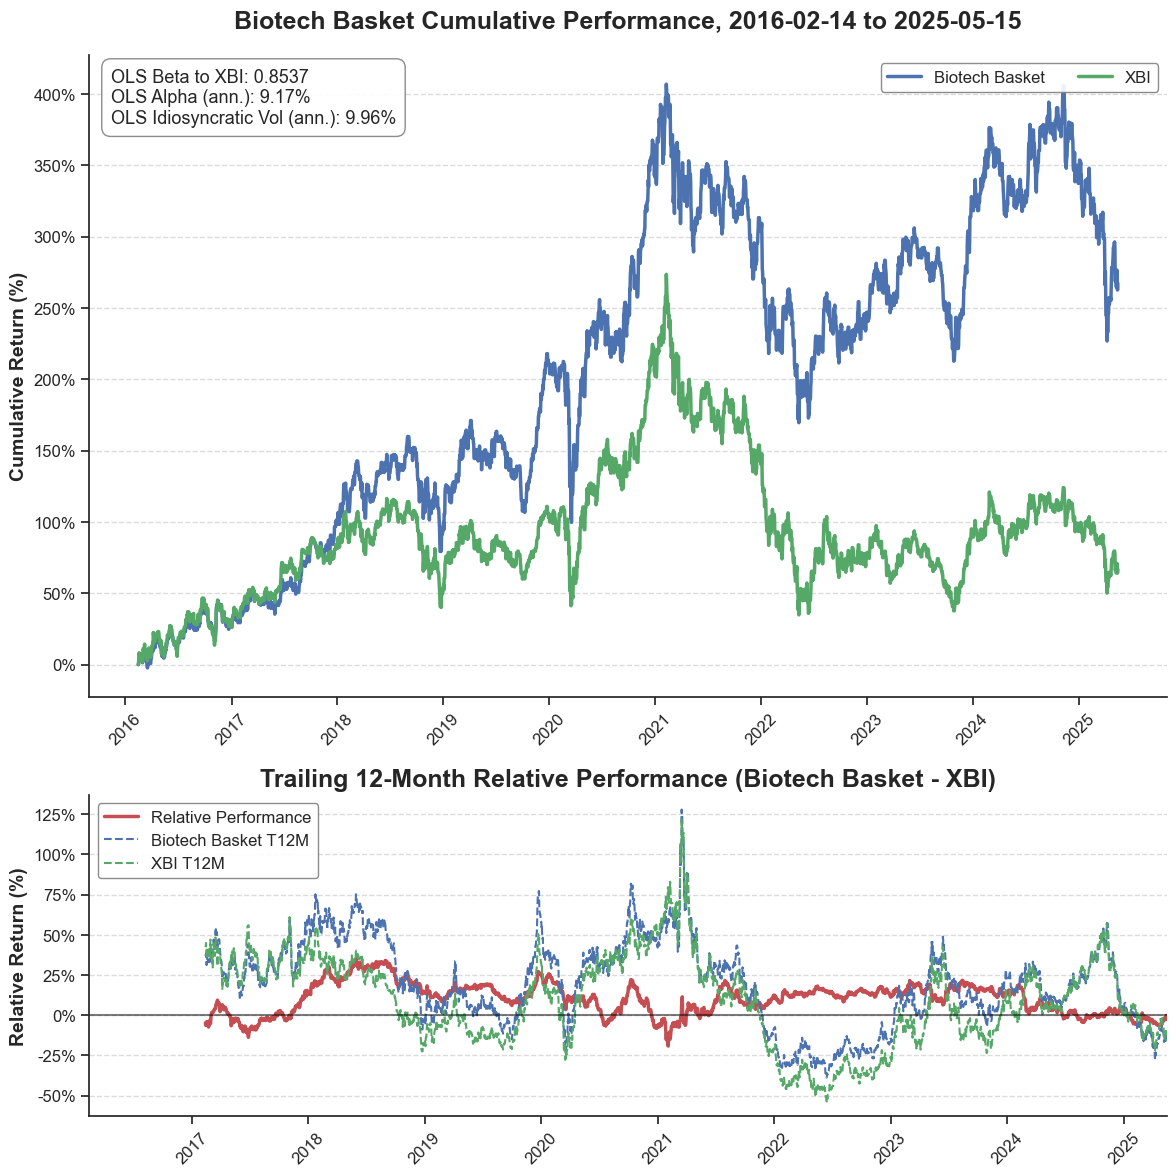

In [96]:
# Get strategy returns and XBI returns
strategy_returns = bt.get_strategy_returns(final_holdings, pd.Timestamp('2025-05-15'))
xbi_returns = bt.sec_rets_df['XBI US'].loc[strategy_returns.index[0]:strategy_returns.index[-1]]

# Convert to cumulative returns
strategy_cumulative = (1 + strategy_returns).cumprod() - 1
xbi_cumulative = (1 + xbi_returns).cumprod() - 1

# Create a DataFrame for plotting
cumulative_returns = pd.DataFrame({
    'Biotech Basket': strategy_cumulative,
    'XBI': xbi_cumulative
})

# Calculate trailing 12-month cumulative returns for both strategy and XBI
strategy_t12m = (1 + strategy_returns).rolling(window=365).apply(lambda x: x.prod()) - 1
xbi_t12m = (1 + xbi_returns).rolling(window=365).apply(lambda x: x.prod()) - 1

# Calculate trailing 12-month relative performance (Strategy T12M - XBI T12M)
trailing_12m_relative = strategy_t12m - xbi_t12m
# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [2, 1]})

# Compute beta and alpha to XBI for regular strategy
returns_for_regression = pd.DataFrame({
    'strategy': strategy_returns,
    'xbi': xbi_returns
})
returns_for_regression = returns_for_regression.dropna()
returns_for_regression = returns_for_regression[(returns_for_regression['strategy'] != 0) | 
                                               (returns_for_regression['xbi'] != 0)]

# Add a constant to the regression model
X = sm.add_constant(returns_for_regression['xbi'])
Y = returns_for_regression['strategy']

# Fit the regression model
model = sm.OLS(Y, X).fit()
# Extract beta and alpha
beta = model.params['xbi']
alpha = model.params['const']
alpha_annualized = alpha * len(returns_for_regression) / ((strategy_returns.index[-1] - strategy_returns.index[0]).days / 365.25)

idio_vol = model.resid.std()
idio_vol_annualized = idio_vol * np.sqrt(len(returns_for_regression) / ((strategy_returns.index[-1] - strategy_returns.index[0]).days / 365.25))
# Set a professional theme and color palette
sns.set_theme(style="ticks", palette="colorblind", font="Arial", font_scale=1.2)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Plot 1: Cumulative Performance
colors = ["#4C72B0", "#55A868"]  # Different professional colors
ax1.grid(True, linestyle='--', alpha=0.7, axis='y')
sns.lineplot(data=cumulative_returns, ax=ax1, linewidth=2.5, palette=colors, dashes=False)

# Format the plot
ax1.set_title(f"Biotech Basket Cumulative Performance, {cumulative_returns.index.min().strftime('%Y-%m-%d')} to {cumulative_returns.index.max().strftime('%Y-%m-%d')}", fontsize=18, fontweight='bold', pad=20)
ax1.set_ylabel("Cumulative Return (%)", fontsize=14, fontweight='bold')
ax1.set_xlabel("")  # Remove x-axis label
ax1.tick_params(axis='both', labelsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Enhance legend
legend = ax1.legend(title="", loc='upper right', ncol=2, frameon=True, framealpha=0.9, 
                   fontsize=12, edgecolor='gray')
legend.get_frame().set_linewidth(1)

# Add metrics box with enhanced styling
metrics_text = (
    f"OLS Beta to XBI: {beta:.4f}\n"
    f"OLS Alpha (ann.): {alpha_annualized*100:.2f}%\n"
    f"OLS Idiosyncratic Vol (ann.): {idio_vol_annualized*100:.2f}%"
)

ax1.text(0.02, 0.98, metrics_text, transform=ax1.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', 
                                          facecolor='white', 
                                          edgecolor='gray', 
                                          alpha=0.9,
                                          linewidth=1))

# Plot 2: Trailing 12-month Relative Performance
ax2.grid(True, linestyle='--', alpha=0.7, axis='y')
sns.lineplot(data=trailing_12m_relative, color="#C44E52", 
            ax=ax2, linewidth=2.5, label='Relative Performance')

# Add individual T12M returns as dotted lines
sns.lineplot(data=strategy_t12m, color="#4C72B0", ax=ax2, 
            linewidth=1.5, linestyle='--', label='Biotech Basket T12M')
sns.lineplot(data=xbi_t12m, color="#55A868", ax=ax2, 
            linewidth=1.5, linestyle='--', label='XBI T12M')

# Format the second plot
ax2.set_title("Trailing 12-Month Relative Performance (Biotech Basket - XBI)", 
             fontsize=18, fontweight='bold')
ax2.set_ylabel("Relative Return (%)", fontsize=14, fontweight='bold')
ax2.set_xlabel("")  # Remove x-axis label
ax2.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1.5)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Add legend for the second plot
ax2.legend(title="", loc='upper left', ncol=1, frameon=True, framealpha=0.9, 
          fontsize=12, edgecolor='gray')

# Ensure both plots have the same x-axis range
ax2.set_xlim(cumulative_returns.index.min(), cumulative_returns.index.max())

plt.tight_layout()
plt.show()


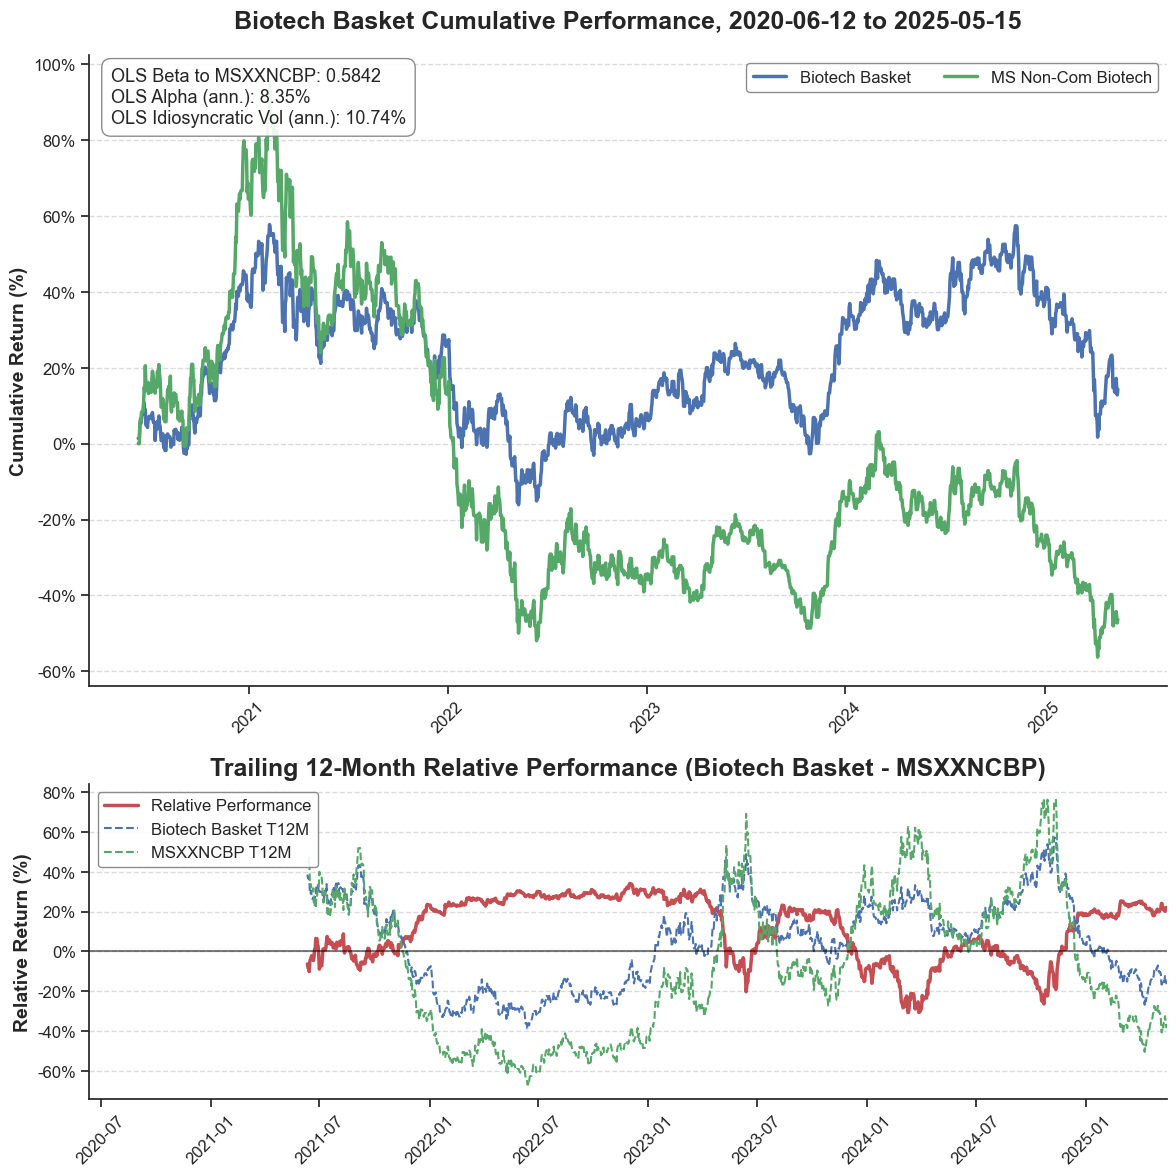

In [97]:
# Get strategy returns and MSXXNCB returns
strategy_returns = bt.get_strategy_returns(final_holdings, pd.Timestamp('2025-05-15'))
msxxncb_returns = bt.sec_rets_df['MSXXNCB'].loc[strategy_returns.index[0]:strategy_returns.index[-1]]

# Filter both series to start from June 12, 2020
start_date = pd.Timestamp('2020-06-12')
strategy_returns = strategy_returns[strategy_returns.index >= start_date]
msxxncb_returns = msxxncb_returns[msxxncb_returns.index >= start_date]

# Convert to cumulative returns
strategy_cumulative = (1 + strategy_returns).cumprod() - 1
msxxncb_cumulative = (1 + msxxncb_returns).cumprod() - 1

# Create a DataFrame for plotting
cumulative_returns = pd.DataFrame({
    'Biotech Basket': strategy_cumulative,
    'MS Non-Com Biotech': msxxncb_cumulative
})

# Calculate trailing 12-month cumulative returns for both strategy and MSXXNCB
strategy_t12m = (1 + strategy_returns).rolling(window=365).apply(lambda x: x.prod()) - 1
msxxncb_t12m = (1 + msxxncb_returns).rolling(window=365).apply(lambda x: x.prod()) - 1

# Calculate trailing 12-month relative performance (Strategy T12M - MSXXNCB T12M)
trailing_12m_relative = strategy_t12m - msxxncb_t12m

# Create a figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [2, 1]})

# Compute beta and alpha to MSXXNCB for regular strategy
returns_for_regression = pd.DataFrame({
    'strategy': strategy_returns,
    'msxxncb': msxxncb_returns
})
returns_for_regression = returns_for_regression.dropna()
returns_for_regression = returns_for_regression[(returns_for_regression['strategy'] != 0) | 
                                               (returns_for_regression['msxxncb'] != 0)]

# Add a constant to the regression model
X = sm.add_constant(returns_for_regression['msxxncb'])
Y = returns_for_regression['strategy']

# Fit the regression model
model = sm.OLS(Y, X).fit()
# Extract beta and alpha
beta = model.params['msxxncb']
alpha = model.params['const']
alpha_annualized = alpha * len(returns_for_regression) / ((strategy_returns.index[-1] - strategy_returns.index[0]).days / 365.25)

idio_vol = model.resid.std()
idio_vol_annualized = idio_vol * np.sqrt(len(returns_for_regression) / ((strategy_returns.index[-1] - strategy_returns.index[0]).days / 365.25))

# Set a professional theme and color palette
sns.set_theme(style="ticks", palette="colorblind", font="Arial", font_scale=1.2)
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Plot 1: Cumulative Performance
colors = ["#4C72B0", "#55A868"]  # Different professional colors
ax1.grid(True, linestyle='--', alpha=0.7, axis='y')
sns.lineplot(data=cumulative_returns, ax=ax1, linewidth=2.5, palette=colors, dashes=False)

# Format the plot
ax1.set_title(f"Biotech Basket Cumulative Performance, {cumulative_returns.index.min().strftime('%Y-%m-%d')} to {cumulative_returns.index.max().strftime('%Y-%m-%d')}", fontsize=18, fontweight='bold', pad=20)
ax1.set_ylabel("Cumulative Return (%)", fontsize=14, fontweight='bold')
ax1.set_xlabel("")  # Remove x-axis label
ax1.tick_params(axis='both', labelsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Enhance legend
legend = ax1.legend(title="", loc='upper right', ncol=2, frameon=True, framealpha=0.9, 
                   fontsize=12, edgecolor='gray')
legend.get_frame().set_linewidth(1)

# Add metrics box with enhanced styling
metrics_text = (
    f"OLS Beta to MSXXNCBP: {beta:.4f}\n"
    f"OLS Alpha (ann.): {alpha_annualized*100:.2f}%\n"
    f"OLS Idiosyncratic Vol (ann.): {idio_vol_annualized*100:.2f}%"
)

ax1.text(0.02, 0.98, metrics_text, transform=ax1.transAxes, fontsize=13,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', 
                                          facecolor='white', 
                                          edgecolor='gray', 
                                          alpha=0.9,
                                          linewidth=1))

# Plot 2: Trailing 12-month Relative Performance
ax2.grid(True, linestyle='--', alpha=0.7, axis='y')
sns.lineplot(data=trailing_12m_relative, color="#C44E52", 
            ax=ax2, linewidth=2.5, label='Relative Performance')

# Add individual T12M returns as dotted lines
sns.lineplot(data=strategy_t12m, color="#4C72B0", ax=ax2, 
            linewidth=1.5, linestyle='--', label='Biotech Basket T12M')
sns.lineplot(data=msxxncb_t12m, color="#55A868", ax=ax2, 
            linewidth=1.5, linestyle='--', label='MSXXNCBP T12M')

# Format the second plot
ax2.set_title("Trailing 12-Month Relative Performance (Biotech Basket - MSXXNCBP)", 
             fontsize=18, fontweight='bold')
ax2.set_ylabel("Relative Return (%)", fontsize=14, fontweight='bold')
ax2.set_xlabel("")  # Remove x-axis label
ax2.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5, linewidth=1.5)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x*100:.0f}%'))

# Add legend for the second plot
ax2.legend(title="", loc='upper left', ncol=1, frameon=True, framealpha=0.9, 
          fontsize=12, edgecolor='gray')

# Ensure both plots have the same x-axis range
ax2.set_xlim(cumulative_returns.index.min(), cumulative_returns.index.max())

plt.tight_layout()
plt.show()

In [88]:
# Get the holdings for the specified date
holdings = final_holdings.loc[pd.Timestamp('2025-02-14')].dropna().loc[lambda x: x != 0]
# Sort by size (value) in descending order
sorted_holdings = holdings.sort_values(ascending=False)
# Convert to percentage and print the sorted holdings
percentage_holdings = sorted_holdings * 100
print(percentage_holdings)

# Calculate and print average, max, and min weights across all dates
hhi = (1/(final_holdings**2).sum(axis=1))
max_weight = final_holdings.max().max() * 100
print(f"Avg Effective Concentration: {hhi.mean():.2f}")
print(f"Minimum Effective Concentration: {hhi.min():.2f}")
print(f"Average max weight: {final_holdings.max(axis=1).mean()*100:.2f}%")
print(f"Maximum weight across all dates: {max_weight:.2f}%")


NTRA US    7.080920
PCVX US    3.705403
ARGX BB    3.039695
VERA US    3.016437
ASND US    2.786384
             ...   
IRWD US    0.375936
AVBP US    0.375026
STVN US    0.374585
DNTH US    0.366419
MDXG US    0.360232
Name: 2025-02-14 00:00:00, Length: 100, dtype: float64
Avg Effective Concentration: 55.72
Minimum Effective Concentration: 26.46
Average max weight: 6.18%
Maximum weight across all dates: 11.78%


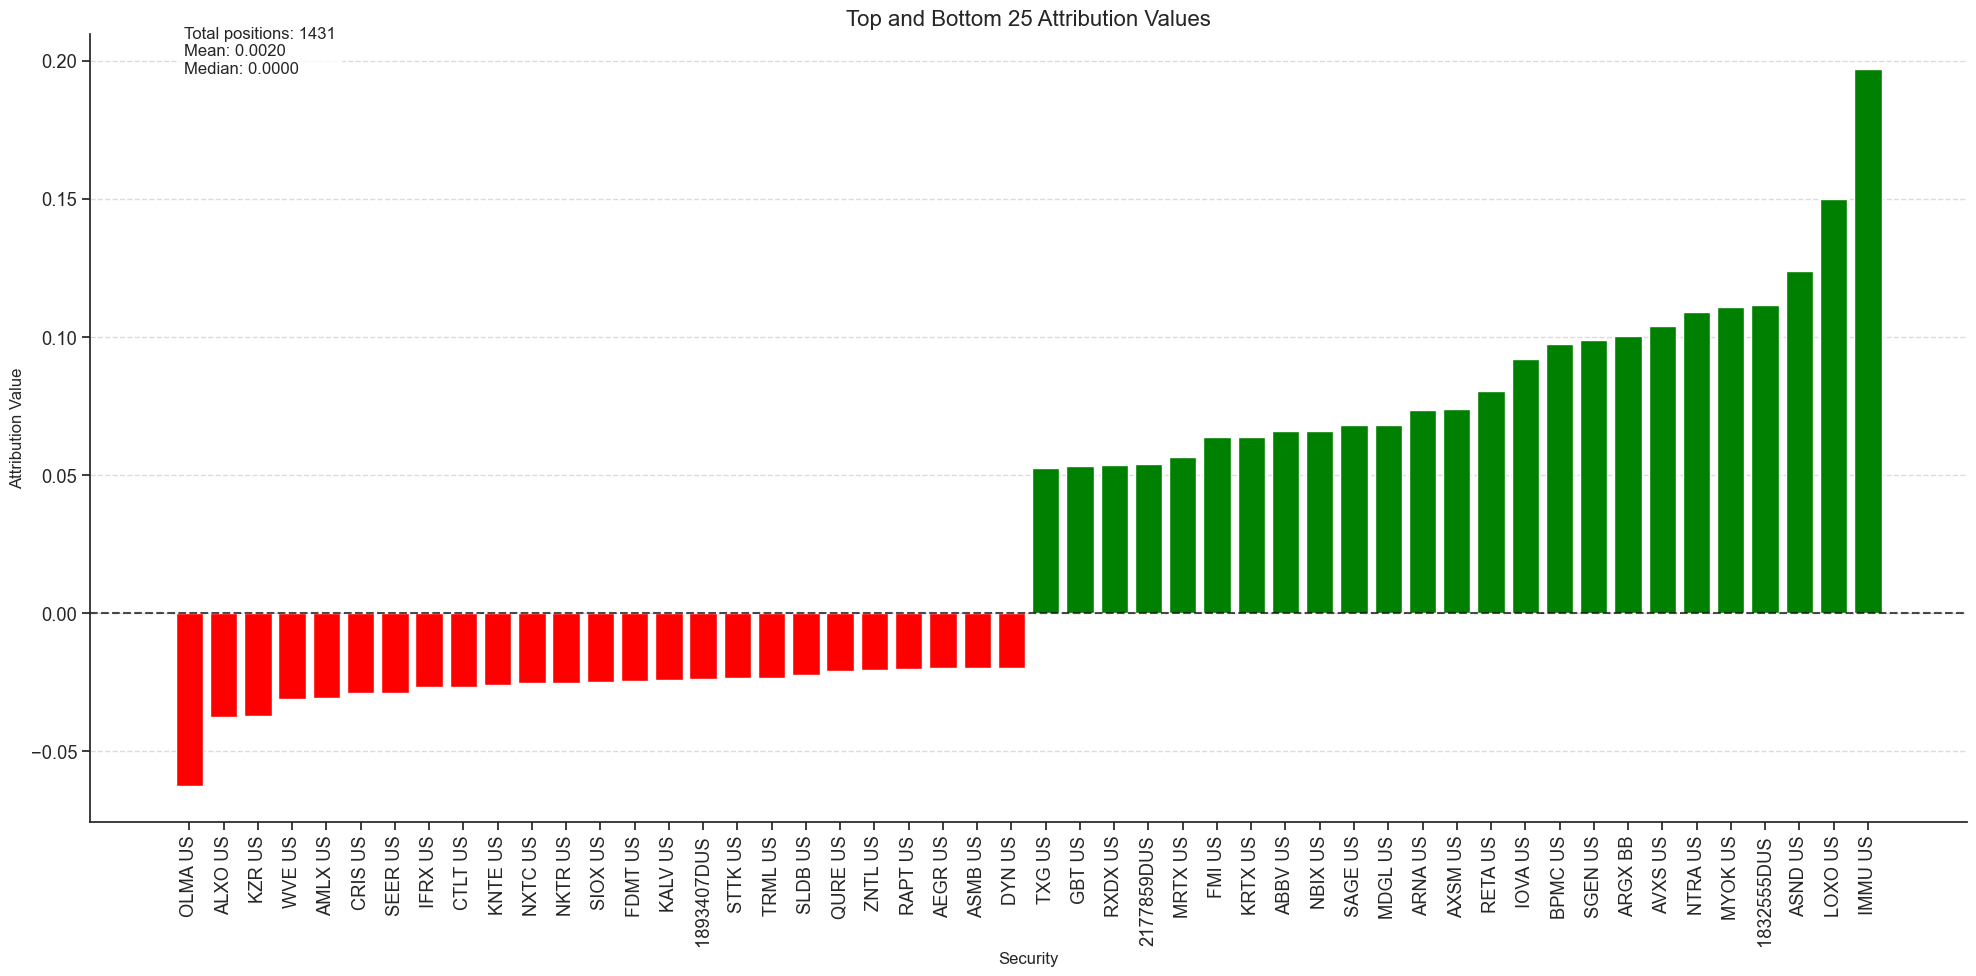

In [89]:
attr = bt.get_strategy_attribution(final_holdings, end_date=pd.Timestamp('2025-03-31'))
attr = FilingBacktester.carino_attribution(attr)

# Sort all attribution values from smallest to largest
plot_data = attr.sort_values()

# Get the bottom 25 and top 25 attributions
bottom_25 = plot_data.head(25)
top_25 = plot_data.tail(25)

# Combine them into a single dataframe for plotting
combined_data = pd.concat([bottom_25, top_25])

# Create a bar plot for the top and bottom 25 attributions with wider figure
plt.figure(figsize=(20, 10))
bars = plt.bar(combined_data.index, combined_data.values, color=['red' if x < 0 else 'green' for x in combined_data.values])

# Add labels and title
plt.title('Top and Bottom 25 Attribution Values', fontsize=16)
plt.xlabel('Security', fontsize=12)
plt.ylabel('Attribution Value', fontsize=12)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add summary statistics as text
plt.text(0.05, 0.95, f"Total positions: {len(attr)}\nMean: {plot_data.mean():.4f}\nMedian: {plot_data.median():.4f}", 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()


In [85]:
factor_ctr = bt.get_factor_attribution(final_holdings, factor_scores, factor_rets, pd.Timestamp('2025-03-31'))
carino_factor_ctr = FilingBacktester.carino_attribution(factor_ctr)
print(carino_factor_ctr)
print(carino_factor_ctr.sum())
print(carino_factor_ctr/carino_factor_ctr.sum())

Size       -0.955688
Momentum    0.373715
Reversal    0.309882
Market      1.350204
Idio        1.661090
dtype: float64
2.7392025117481644
Size       -0.348893
Momentum    0.136432
Reversal    0.113129
Market      0.492919
Idio        0.606414
dtype: float64


C:\Users\NWeatherly\AppData\Local\Temp\ipykernel_30356\2660279617.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
C:\Users\NWeatherly\AppData\Local\Temp\ipykernel_30356\2660279617.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]


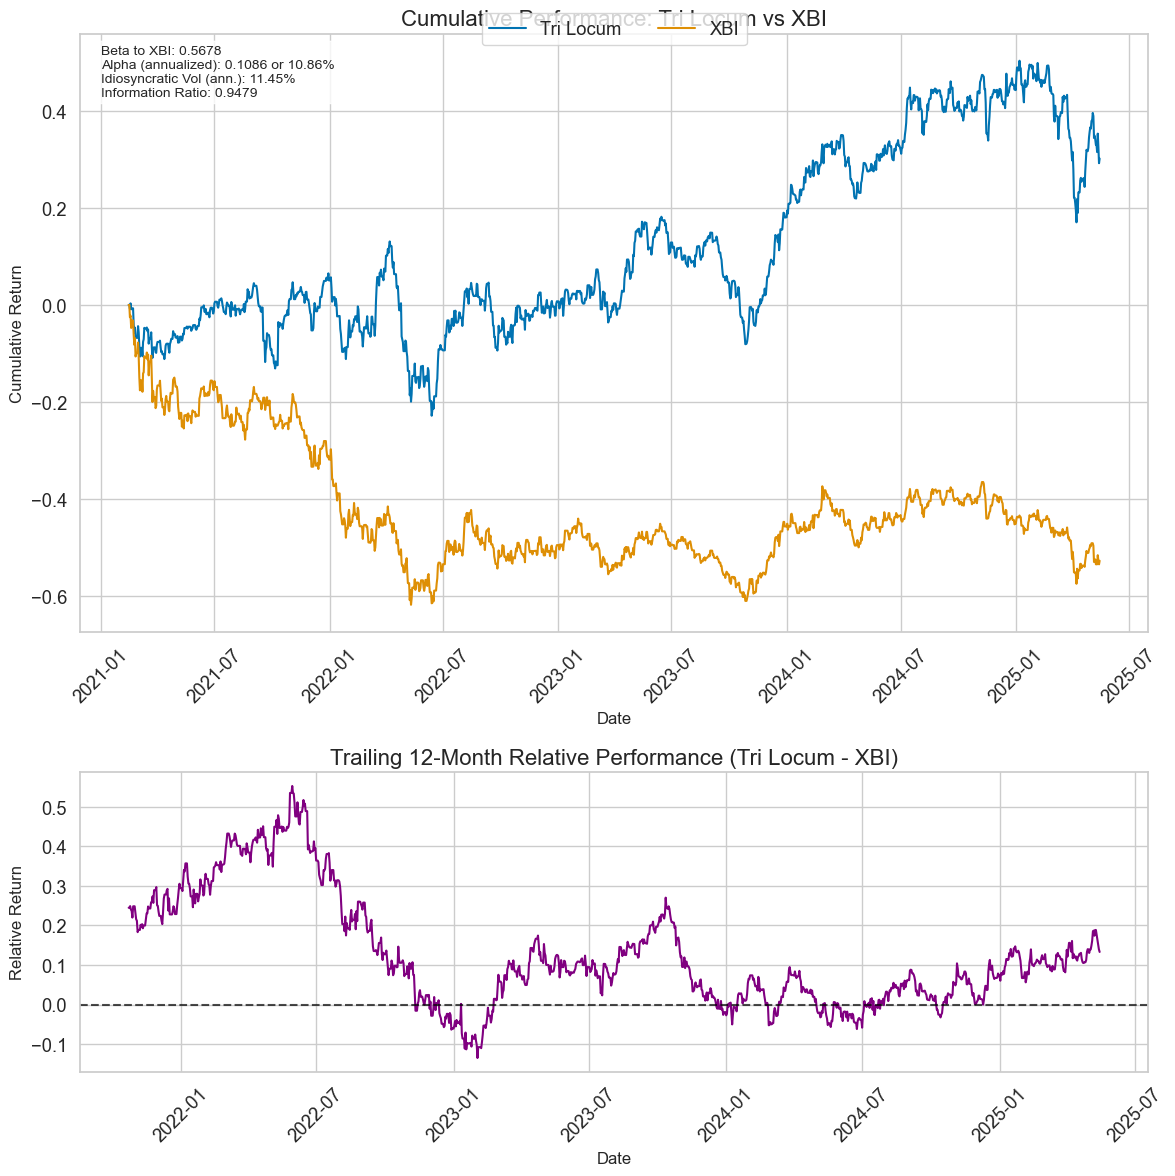

In [35]:
# Set the Master fund to analyze
master_fund = "Tri Locum"  # Change this to the fund you want to analyze

# Get the fund's holdings
holdings = bt.get_fund_holdings(master_fund, contamination=False)
# Add 45 days to the holdings index to account for filing delay
holdings.index = holdings.index + pd.Timedelta(days=45)
holdings = bt.adjust_holdings(holdings, max_participation=0.1, port_size=10000000)

perf = bt.get_strategy_returns(holdings, max(holdings.index)+pd.Timedelta(days=90))

# Get XBI returns for comparison
xbi = bt.sec_rets_df['XBI US'].loc[perf.index[0]:perf.index[-1]]
xbi_cum_perf = (1+xbi).cumprod()-1

# Replace NaN values with 0 to avoid issues in cumulative performance calculation
perf = perf.fillna(0)
cum_perf = (1+perf).cumprod()-1

# Calculate trailing 12-month relative performance
trailing_12m = pd.DataFrame({
    master_fund: perf.rolling(252).sum(),
    'XBI': xbi.rolling(252).sum()
})
trailing_12m_relative = trailing_12m[master_fund] - trailing_12m['XBI']

# Calculate regression metrics
X = sm.add_constant(xbi)
model = sm.OLS(perf, X).fit()
beta = model.params[1]
alpha = model.params[0]
alpha_annualized = alpha * 252
idio_vol = np.std(model.resid)
idio_vol_annualized = idio_vol * np.sqrt(252)
information_ratio = alpha_annualized / idio_vol_annualized

# Create a DataFrame for cumulative returns
cumulative_returns = pd.DataFrame({
    master_fund: cum_perf,
    'XBI': xbi_cum_perf
})

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [2, 1]})

# Plot 1: Cumulative Performance
sns.set_style("whitegrid")
sns.lineplot(data=cumulative_returns, dashes=False, ax=ax1)
ax1.set_title(f"Cumulative Performance: {master_fund} vs XBI", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Cumulative Return", fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.legend(title="", loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)

# Add text box with metrics to the top left corner of the main plot
metrics_text = (f"Beta to XBI: {beta:.4f}\n"
                f"Alpha (annualized): {alpha_annualized:.4f} or {alpha_annualized*100:.2f}%\n"
                f"Idiosyncratic Vol (ann.): {idio_vol_annualized*100:.2f}%\n"
                f"Information Ratio: {information_ratio:.4f}")

ax1.text(0.02, 0.98, metrics_text, transform=ax1.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Plot 2: Trailing 12-month Relative Performance
sns.lineplot(data=trailing_12m_relative, color='purple', ax=ax2)
ax2.set_title(f"Trailing 12-Month Relative Performance ({master_fund} - XBI)", fontsize=16)
ax2.set_xlabel("Date", fontsize=12)
ax2.set_ylabel("Relative Return", fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.axhline(y=0, color='black', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()